# Bike Sharing Demand (Kaggle)

* By: Tae Hyung (Denny) Kim

## Data Fields

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv('/Users/taehyung/Desktop/DS_School/BikeSharingDemand/train.csv', parse_dates=["datetime"])
print(train.shape)

train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv('/Users/taehyung/Desktop/DS_School/BikeSharingDemand/test.csv', parse_dates=["datetime"])
print(test.shape)

test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

Preprocess the data before it could be used in the machine learning

### Parse datetime

processing 'datetime' column

datetime column seeems to be composed of numbers:(ex: 2011-01-01 00:00:00) but it's not numbers and acknolwedged as 'datetime 64' due to hyphens & colons --> to use 'datetime' column, it needs to be processed  so that machinelearning algorithm can comprehend. 

Easy way to process datetime column is by dividing it by year, month, day, hour, mintute, second.
* ex: 2011-01-01 00:00:00 --> year = 2011 month = 1 day = 1 hour = 0 minute = 0 second = 0 ----> 2011, 1, 1, 0, 0, 0  total of 6 nubmers 

--> dividing 'datetime' column in to six seperate columns. 


In [4]:
# dt = 'datetime'

train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

# dayofweek == getting days of the week 
# 0( Mon), 1(Tues), 2(Wed), 3(Thu), 4(Fri), 5(Sat), 6(Sun)

train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)

train[["datetime", "datetime-year", "datetime-month",
       "datetime-day", "datetime-hour", "datetime-minute", 
       "datetime-second", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [5]:
# making 'datetime-dayofweek' more intiuitive (Monday ~ Sunday)
# adding it to new column: 'datetime-dayofweek(humanized)''

train.loc[train["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
train.loc[train["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
train.loc[train["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
train.loc[train["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
train.loc[train["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
train.loc[train["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
train.loc[train["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"


print(train.shape)

train[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(10886, 20)


,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-01 00:00:00,5,Saturday
1,2011-01-01 01:00:00,5,Saturday
2,2011-01-01 02:00:00,5,Saturday
3,2011-01-01 03:00:00,5,Saturday
4,2011-01-01 04:00:00,5,Saturday


In [6]:
# same process with the 'test' file

test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

test["datetime-dayofweek"] = test["datetime"].dt.dayofweek
print(test.shape)

test[["datetime", "datetime-year", "datetime-month", "datetime-day",
      "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


In [7]:
# same proces for 'test' file cont....

test.loc[test["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
test.loc[test["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
test.loc[test["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
test.loc[test["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
test.loc[test["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
test.loc[test["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
test.loc[test["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

print(test.shape)

test[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(6493, 17)


,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-20 00:00:00,3,Thursday
1,2011-01-20 01:00:00,3,Thursday
2,2011-01-20 02:00:00,3,Thursday
3,2011-01-20 03:00:00,3,Thursday
4,2011-01-20 04:00:00,3,Thursday


### Exploring Data

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### datetime

Analyzing  **(datetime)** column 


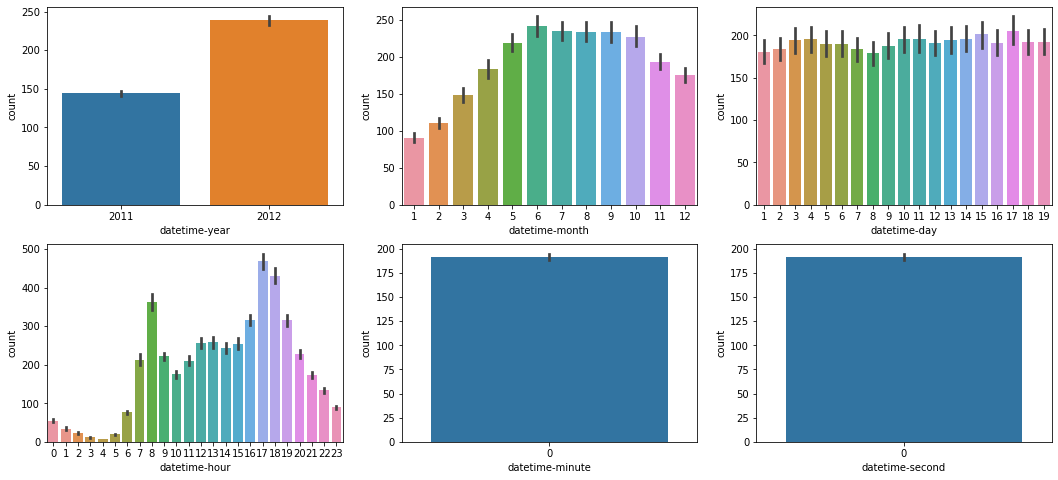

In [9]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

as could be interpreted by the charts above

**datetime-year** 
  * Bicycle rental in 2012 is higher than in 2011. This indicates that there has been a growth.

**datetime-month**
  * People usally rent bicycle the most in June - Aug & and the least in Nov - Feb
**datetime-day**
  * There is only up to 19th day in the x-axis. 20th day onwards is located in the 'test' data set.  
  * From the visualizations above we could observe that 'train' & 'test' data could be distinguished by the 'date-time-day' column 
  
  --> in this case if 'date-time-day' is used in features, it could lead to OVERFITTING in machinelearning algorithm
  --> it there is column that divides/distinguishes 'train' & 'test' data --> don't use it in feature

**datetime-hour**
  * People mostly rent their bikes in the afternoon and much less at dawn.
  * There are particular time frames where people rent bikes in highest frequency: 7am~9am & 4~7pm. This suggests that people rent bikes the most when they are commuting to work.

**datetime-minute** & **datetime-second**
  * These two columns has x label == 0. Thus, **datetime-minute**과 **datetime-second** is not recorded --> do not include as features
  
From the visualizations, I can conclude that of the 6 columns ,using only ** datetime-year, datetime-month,and datetime-hour will lead to best analysis.**

### datetime-year & datetime-month

* Join year & month 
* This will show holistic visualizaton from 2011.01 ~ 2012.12, a total of 24 month as x-label.
* Create dattime-year_month column

In [10]:
train["datetime-year(str)"] = train["datetime-year"].astype('str')
train["datetime-month(str)"] = train["datetime-month"].astype('str')

train["datetime-year_month"] = train["datetime-year(str)"] + "-" + train["datetime-month(str)"]

print(train.shape)

train[["datetime", "datetime-year_month"]].head()

(10886, 23)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


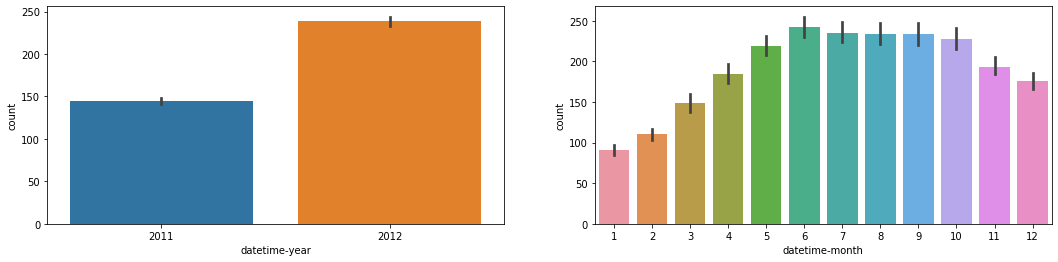

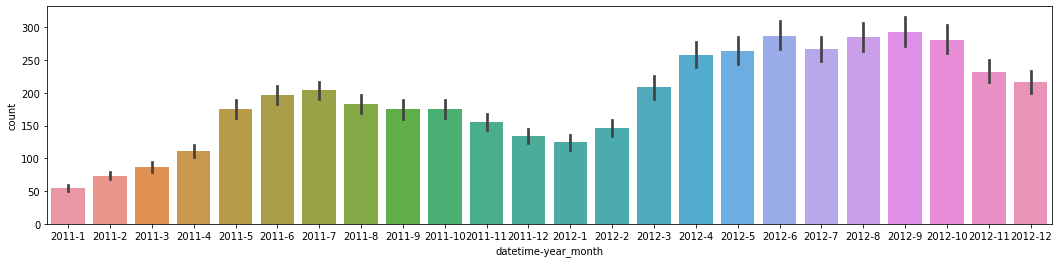

In [11]:
# matplotlib subplots --> allows to visualize multiple functions on a screen
# 1 x 2 two visuals on a screen

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# select visuzl size to 18 x 4
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

From the visual above, I can infer....

  * Capital Bikeshare's bike rental rate is increasing.
  * Top right figure above shows that, birke rental rate in January is twice as higher than in December. 
  * Bottom figure shows that, there wasn't much difference in bike rental rate between 2011 December and 2012 January. However, there is a signficicant difference betweeen 2012 December and 2011 January.
  
  * Why rental rate in December is twice as high as January: Rental rate is generally in increasing trend, and December is later in the year than January.
  *
**This could lead to overfitting**
  * To ameilorate overfitting, disregard 'datetime-month'
  * Just use 'year':yearly trend and 'hour': daily trend column

### datetime-hour

Analyzing **datetime-hour** column

* comparing bike rental rate on 'workingday' and on datetime-dayofweek


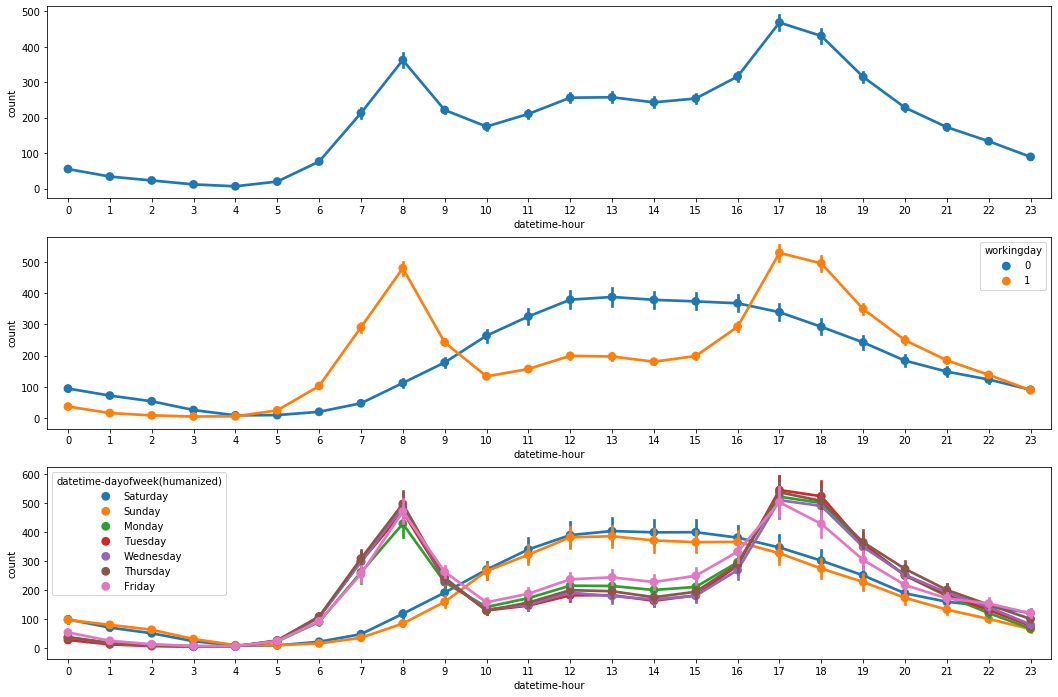

In [12]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

figure.set_size_inches(18, 12)

# figure1. bike rentals per hour 
sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)

# figure2. shows how #of rental differs by working/non-working days
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

# figure3. shows how #of rental differs by day (datetime-dayofweek)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek(humanized)", ax=ax3)

From the figure above I can infer that 
  * During workdays (workingday ==1), bike rental rate is high from 7am~9am and 5pm to 7pm.
  * During non-workdays(workingday == 0), bike rental rate is high during 10am ~ 4pm.

Bike rental rate by **(datetime-dayofweek)**

  * On Friday, the rental rate is slightly lower than that of other working days. Perhaps this is case because people tend to go out for dinner/drink and hence use alternative medium of transportation such as bus, uber, etc. 
  * During weekends,rental rate is higher on saturday. This could be the case since people tend to spend time at home on Sundays(since they have to work the next day).  
  
Including(datetime-dayofweek) in the ML algorthims as a feature could enhance results. --> Add (datetime-dayofweek) as feature.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

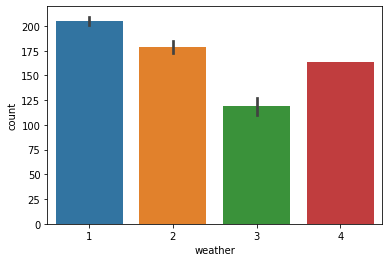

In [14]:
sns.barplot(data = train, x = 'weather', y = 'count')

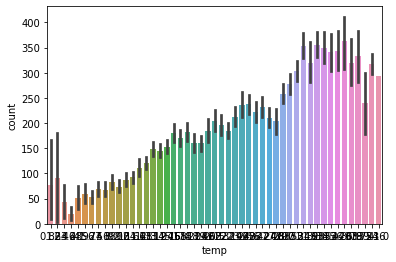

In [15]:
sns.barplot(data = train, x = 'temp', y = 'count')

In [16]:
## train[abs(train['temp']- train['atemp'])>10]
## test[abs(train['temp']- train['atemp'])>10]
## sns.Implot(data = train, x= 'temp', y = 'atemp')
## sns.distplot(train["windspeed"])

#### Looking at windspeed data

In [17]:
train[train["windspeed"]==0].shape

(1313, 23)

In [18]:
test[test["windspeed"]==0].shape

(867, 17)

In [19]:
### there are 17 cases where windspeed == 0 --> It's impossible for there to be no wind? --> fill up the value 

In [20]:
import numpy as np

In [21]:
train.loc[train['windspeed'] == 0, "windspeed"]  = np.nan

In [22]:
## based on weather windspeed is averaged

mean_1 = train.loc[train['weather'] == 1 , "windspeed"].mean()
train.loc[(train["weather"]== 1 ) & (train['windspeed'].isnull()), "windspeed"] = mean_1

mean_2 = train.loc[train['weather'] == 2 , "windspeed"].mean()
train.loc[(train["weather"]== 2 ) & (train['windspeed'].isnull()), "windspeed"] = mean_2

mean_3 = train.loc[train['weather'] == 3 , "windspeed"].mean()
train.loc[(train["weather"]== 3 ) & (train['windspeed'].isnull()), "windspeed"] = mean_3

In [23]:
train.loc[train['windspeed'].isnull()]                 ## check that the value 0 is gone

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month


In [24]:
test.loc[test['windspeed'] == 0, "windspeed"]  = np.nan               # CHECK the value from 0 --> np.nan 

In [25]:
## based on weather windspeed is averaged

mean_1 = test.loc[test['weather'] == 1 , "windspeed"].mean()
test.loc[(test["weather"]== 1 ) & (test['windspeed'].isnull()), "windspeed"] = mean_1

mean_2 = test.loc[test['weather'] == 2 , "windspeed"].mean()
test.loc[(test["weather"]== 2 ) & (test['windspeed'].isnull()), "windspeed"] = mean_2

mean_3 = train.loc[train['weather'] == 3 , "windspeed"].mean()
test.loc[(test["weather"]== 3 ) & (test['windspeed'].isnull()), "windspeed"] = mean_3

In [26]:
test.loc[test['windspeed'].isnull()]                 ### check if the value  '0' disappeared

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized)


#### method to fill windspeed values in windspeed column with linear regression 

In [27]:
# train['windspeed'] = train['windspeed'].interpolate(method = 'linear', limit_direction = 'both', axis =0)

#### There is only one Weather == 4 --> combine it with weather == 3

In [28]:
train[train['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,...,1,9,18,0,0,0,Monday,2012,1,2012-1


In [29]:
train['weather'] = train['weather'].replace(4,3)
train[train['weather'] == 4]                                         ## see that value '4'  in windspeed disappeared 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month


#### Checking Data

In [30]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,14.739018,3,...,1,1,0,0,0,5,Saturday,2011,1,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,14.739018,8,...,1,1,1,0,0,5,Saturday,2011,1,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,14.739018,5,...,1,1,2,0,0,5,Saturday,2011,1,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,14.739018,3,...,1,1,3,0,0,5,Saturday,2011,1,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,14.739018,0,...,1,1,4,0,0,5,Saturday,2011,1,2011-1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.003200,0,...,1,1,5,0,0,5,Saturday,2011,1,2011-1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,14.739018,2,...,1,1,6,0,0,5,Saturday,2011,1,2011-1
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,14.739018,1,...,1,1,7,0,0,5,Saturday,2011,1,2011-1
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,14.739018,1,...,1,1,8,0,0,5,Saturday,2011,1,2011-1
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,14.739018,8,...,1,1,9,0,0,5,Saturday,2011,1,2011-1


### Count

Explore the count (# of bike rental).

** This is the label I need to find


In [31]:
train["count"].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

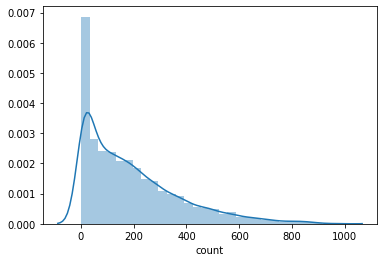

In [32]:
sns.distplot(train["count"], bins = 30)

In [33]:
cc = train[train["count"] <100]
cc.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
count,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.0,4312.0,4312.000000
mean,2.266234,0.031076,0.653989,1.508117,16.713015,19.850026,69.171614,13.792833,5.070501,30.549397,35.619898,2011.411642,5.756725,9.804035,7.284787,0.0,0.0,3.072588
std,1.170301,0.173543,0.475752,0.699557,7.118352,7.845167,18.610382,6.438809,6.250856,26.163696,29.729875,0.492188,3.675096,5.443951,7.224573,0.0,0.0,2.037475
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,6.003200,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,1.000000,0.000000,0.000000,1.000000,10.660000,13.635000,56.000000,8.998100,1.000000,7.000000,9.000000,2011.000000,2.000000,5.000000,2.000000,0.0,0.0,1.000000
50%,2.000000,0.000000,1.000000,1.000000,16.400000,19.695000,71.000000,12.998000,3.000000,23.000000,27.000000,2011.000000,5.000000,10.000000,5.000000,0.0,0.0,3.000000
75%,3.000000,0.000000,1.000000,2.000000,22.345000,25.760000,84.000000,16.997900,7.000000,51.000000,60.000000,2012.000000,9.000000,14.000000,10.000000,0.0,0.0,5.000000
max,4.000000,1.000000,1.000000,3.000000,35.260000,40.910000,100.000000,51.998700,47.000000,99.000000,99.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000


Figure above is highly skewed.
* Because bike rental count of less than 100 marks around 43% of whole rental count.
* However since there are days where bike rental count is significantly high (900<) the plot is skewed.
--> try **log transformation**
    * log transformation can be used to make highly skewed distributions less skewed.

### log transformation

In [34]:
train["log_count"] = np.log(train["count"] + 1)

print(train.shape)
train[["count", "log_count"]].head()

(10886, 24)


,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


### became more normalized curve

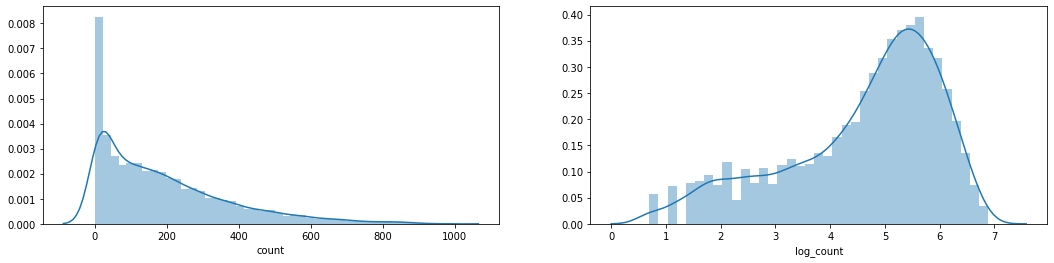

In [35]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.distplot(train["count"], ax=ax1)
sns.distplot(train["log_count"], ax=ax2)

The plot after log transfomration looks more natural (closer to normal distribution). Thus, it's better to use log transformation count. 
    * Use exp to return to original

In [36]:
train["count(recover)"] = np.exp(train["log_count"]) - 1        #return to original value 
print(train.shape)


(10886, 25)


In [37]:
train[["count", "log_count", "count(recover)"]].head()

,count,log_count,count(recover)
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


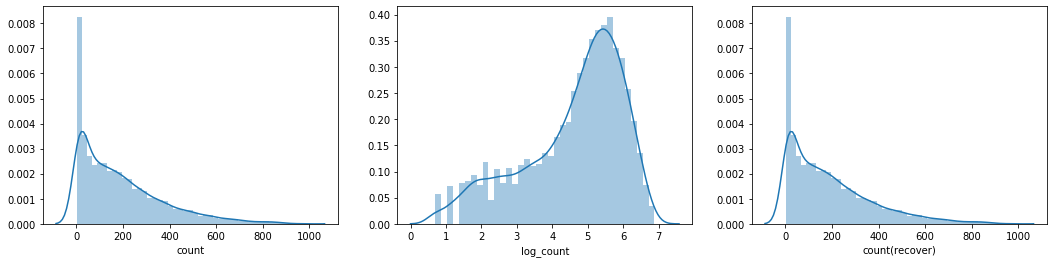

In [38]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18, 4)
sns.distplot(train["count"], ax=ax1)
sns.distplot(train["log_count"], ax=ax2)
sns.distplot(train["count(recover)"], ax=ax3)

In [39]:
### using log value is good for training data  

## Training data sets

Supervised Learning (using feature engineering)

Will use following Features & Label

  * **Feature**: 1)season, 2)holiday, 3)workingday, 4)weather, 5)temp, 6)atemp, 7)humidity, 8)weather, 9?datetime-year, 10)datetime-hour, 11)datetime-dayofweek
  
  * **Label**: Bike rentalcount.
  
Train & test data:
  * **X_train**: "train" data's feature --> X_train
  * **X_test**: "test" data's feature--> X_test
  * **y_train**: train data's label --> y_train

In [40]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [41]:
label_name = "log_count"
label_name

'log_count'

In [42]:
X_train = train[feature_names]
print(X_train.shape)

X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,14.739018,2011,0,5
1,1,0,0,1,9.02,13.635,80,14.739018,2011,1,5
2,1,0,0,1,9.02,13.635,80,14.739018,2011,2,5
3,1,0,0,1,9.84,14.395,75,14.739018,2011,3,5
4,1,0,0,1,9.84,14.395,75,14.739018,2011,4,5


In [43]:
X_test = test[feature_names]
print(X_test.shape)

X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.002700,2011,0,3
1,1,0,1,1,10.66,13.635,56,14.601071,2011,1,3
2,1,0,1,1,10.66,13.635,56,14.601071,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.001400,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.001400,2011,4,3


In [44]:
y_train = train[label_name]
print(y_train.shape)

y_train.head()                                  #y_train = np.log(y_train + 1)

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count, dtype: float64

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

best_n_estimators = 3000
best_max_depth = 83
best_max_features = 0.851358

model = RandomForestRegressor(n_estimators=best_n_estimators,
                              max_depth=best_max_depth,
                              max_features=best_max_features,
                              random_state=37,  #same as set.seed()
                              n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=83, max_features=0.851358, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=-1, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

## Evaluate

Bike Sharing Demand (Kaggle) Evaluation Metric: Root Mean Squared Logarithmic Error (RMSLE)

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

How metric works: Lower the penalty if smaller the difference betweeen the **answer**: ($a_i$, actual) and **prediction value**: ($p_i$, predict)

(```log(count + 1)```is used); will be using [numpy] and [scikit-learn] to implement **RMSLE** funciton.

In [46]:
import numpy as np
from sklearn.metrics import make_scorer

def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    distance = predict - actual
    square_distance = distance ** 2
    
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

rmse_score = make_scorer(rmse)
rmse_score

make_scorer(rmse)

### Score

Will be using Cross-Validation to get the score

In [48]:
from sklearn.model_selection import cross_val_predict

In [49]:
y_predict = cross_val_predict(model, X_train, y_train, cv = 20)

In [50]:

# cross_val_score includes following options....
# 1) model ->  Random Forest
# 2) X_train -> train data's feature 
# 3) y_train-> train data's label
# 4) cv ->  # of data splits in Cross Validation (cv = 20 -> 20 splits)
# 5) scorin -> measuring scores using RMSLE
# find the mean of the result -> assign it to variable name 'score' 


In [53]:
# 'cross_val_score'performs all the functions of cross validation.
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X_train, y_train,
                        cv=20, scoring=rmse_score).mean()

#print assigned score
print("Score = {0:.5f}".format(score))

Score = 0.34908


In [55]:
# Got decent score -> train model 

### Training Machine Learning model (Fitting) 

In [56]:
# When training model -> x_train , y_train is used
# Random Forest Regressor

In [57]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=83, max_features=0.851358, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=-1, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

## MAE (Mean Absolute Error)

In [58]:
# Average Error

abs(y_predict - y_train).mean()

0.2469413724221103

In [59]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, y_predict)

0.24694137242210998

## MSE (Mean Squared Error)

import numpy as np
np.square(y_predict - y_train).mean()

In [60]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_predict)

0.12649417217139203

## RMSE (Root Mean Squared Error)

score = np.square(y_predict - y_train).mean()
score = np.sqrt(score)
score

In [61]:
score = mean_squared_error(y_train, y_predict)
score = np.sqrt(score)
score

0.35566019199706905

## RMSLE (Root Mean Squared Logarithmic Error)

np.sqrt(
    np.square(
        np.log(y_predict +1) - np.log(y_train + 1)
    ).mean()
)

In [62]:
from sklearn.metrics import mean_squared_log_error

score = mean_squared_log_error(y_train, y_predict)
score = np.sqrt(score)
score

0.09089198347493384

## Predict

In [63]:
log_predictions = model.predict(X_test)
print(log_predictions.shape)

log_predictions

(6493,)


array([2.52660955, 1.72584276, 1.36803357, ..., 4.5871464 , 4.58540265,
       3.86659872])

In [64]:
predictions = np.exp(log_predictions) - 1
print(predictions.shape)

predictions

(6493,)


array([11.51101613,  4.61725303,  2.92761971, ..., 97.21376703,
       97.04265609, 46.77959783])

## Submit
Utilized Random Forest & predict to find the # of bike rented. --> submit to kaggle in correct format 

In [65]:
submission = pd.read_csv('/Users/taehyung/Desktop/DS_School/BikeSharingDemand/sampleSubmission.csv')
print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [66]:
submission["count"] = predictions
print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.511016
1,2011-01-20 01:00:00,4.617253
2,2011-01-20 02:00:00,2.927620
3,2011-01-20 03:00:00,3.107534
4,2011-01-20 04:00:00,2.640785


In [67]:
submission.to_csv('/Users/taehyung/Desktop/DS_School/BikeSharingDemand/Denny_BikeShare_Analysis.csv', index=False)